Quantifying the shear magnitudes when using a normal and bigger FoV.

In [1]:
import numpy as np
import matplotlib.pyplot as plt



In [2]:
subhalos = ["7", "8", "9", "11", "20", "56405", "56406", "83991",
            "83996", "84010", "100675", "116278", "172209", "313415", 
            "341482", "344595", "396742", "414107", "451938", "485608",
            "545285"]
Nsubhalos = len(subhalos)

shear_normal = np.empty([Nsubhalos])
shear_bigger = np.empty([Nsubhalos])

for i, s in enumerate(subhalos):
        # Opens the results
    with open("./{}/model1/normal/shear/dyLens/phase5/results.rst".format(s), 'r') as file_N:
        # Read all lines
        line_N = file_N.readlines()
        
    with open("./{}/model1/bigger/shear/dyLens/phase5/results.rst".format(s), 'r') as file_G:
        # Read all lines
        line_G = file_G.readlines()

    # Skip the header
    line_N = line_N[4:]
    line_G = line_G[4:]
    
    # Read mag shear result and store it
    shear_normal[i] = float(line_N[-2].split()[1])
    shear_bigger[i] = float(line_G[-2].split()[1])

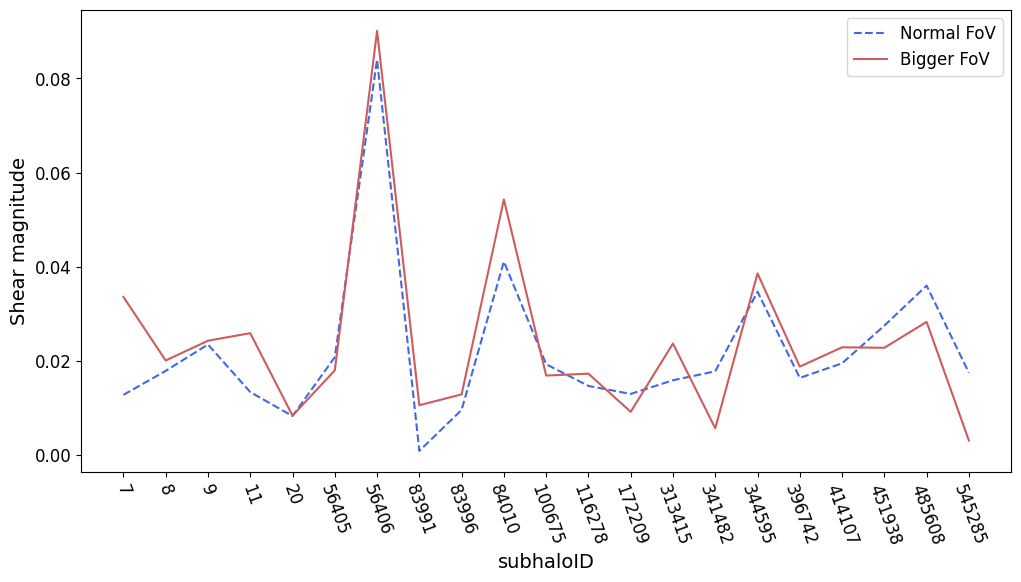

In [3]:
fig, ax = plt.subplots(figsize=(12,6))
x = np.arange(0, Nsubhalos, 1)   # just to plot

ax.plot(shear_normal, label="Normal FoV", color="royalblue", linestyle="--")
ax.plot(shear_bigger, label="Bigger FoV", color="indianred")

ax.set_ylabel("Shear magnitude", size=14)
ax.set_xlabel("subhaloID", size=14)
ax.set_xticks(x, subhalos)

ax.legend(fontsize=12)

plt.xticks(size=12, rotation=-70)
plt.yticks(size=12);

----

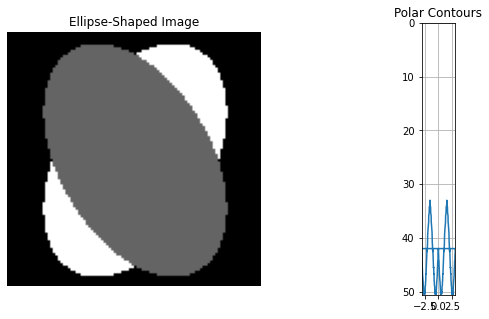

In [99]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.draw import ellipse
from skimage import measure

# Create an ellipse-shaped binary image
image1 = np.zeros((100, 100), dtype=np.uint8)
image2 = np.zeros((100, 100), dtype=np.uint8)

rr1, cc1 = ellipse(50, 50, 30, 50, shape=image.shape, rotation=np.deg2rad(60))
rr2, cc2 = ellipse(50, 50, 30, 50, shape=image.shape, rotation=np.deg2rad(-60))

image1[rr1, cc1] = 255
image1[rr2, cc2] = 100
image = image1 + image2

# Find contours in the binary image
contours = measure.find_contours(image, 0.001)

# Convert Cartesian to Polar coordinates
def cartesian_to_polar(x, y):
    rho = np.sqrt(x**2 + y**2)
    theta = np.arctan2(y, x)
    return rho, theta

polar_contours = []
for contour in contours:
    polar_contour = []
    for point in contour:
        x, y = point
        rho, theta = cartesian_to_polar(x - 50, y - 50)  # Centered around (50, 50)
        polar_contour.append((rho, theta))
    polar_contours.append(polar_contour)

# Plot the original and polar contour
plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Ellipse-Shaped Image')
plt.axis('off')

plt.subplot(122)
plt.gca().set_aspect('equal', adjustable='box')
for polar_contour in polar_contours:
    polar_contour = np.array(polar_contour)
    plt.plot(polar_contour[:, 1], polar_contour[:, 0])
plt.title('Polar Contours')
plt.xlim(-np.pi, np.pi)
plt.ylim(0, np.max(polar_contour[:, 0]))
plt.gca().invert_yaxis()
plt.grid()
plt.show()


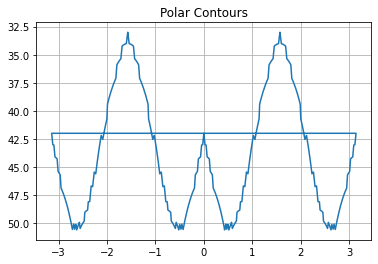

In [100]:
plt.title('Polar Contours')
plt.plot(polar_contour[:, 1], polar_contour[:, 0])
plt.gca().invert_yaxis()

plt.grid()
plt.show()